## Getting Data from API's with Python

** GW Libraries and Academic Innovation**

March 27, 2019

Gelman 219


### Workshop goals

This workshop will cover a couple of basic use cases for retrieving data from RESTful API's with Python. 

By the conclusion of this workshop, you will have worked through the following:

* Understanding the REST framework for data retrieval
* Obtaining and using an API key
* Constructing a query with parameters in Python using the `requests` library
* Writing a `for` loop to retrieve multiple pages of results
* Parsing a JSON response
* Exporting data in CSV format



### Tips for using this Google Colab notebook

When working in a Google Colaboratory notebook, Shift-Return (Shift-Enter) runs the cell you're on. You can also run the cell using the "Play" button at the left edge of the cell.

There are many other keyboard shortcuts. You can access the list via the menu bar, at Tools-->Command palette. In fact, you can even customize your keyboard shortcuts using Tools-->Keyboard shortcuts.

    (If you're working in an Anaconda/Jupyter notebook:

        Shift-Return (Shift-Enter) runs the cell you're on. You can also run the cell using the "Play" button in the toolbar.

> Indented block


        Esc, then A inserts a cell above where you are.
        Esc, then B inserts a cell below where you are.
        More shortcuts under Help --> Keyboard Shortcuts)

You will probably get some errors in working through this notebook. That's okay, you can just go back and change the cell and re-run it.

The notebook auto-saves as you work, just like gmail and most Google apps.

### What is an API?

An **A**pplication **P**rogramming **I**nterface is a generic term for functionality that allows one computer application to talk to another. In contrast to a graphical user interface (GUI), which allows an end user to interact with an application via visual symbols (*e.g.* icons) and manual operations (*e.g.* mouse clicks), an API allows a user to interact with the application by writing code. 


You can think of API's as the glue that holds together the various modules and libraries of code that make up a given system, whether we're talking about a single piece of software or the entire World Wide Web.

-------------------------

### What is REST?

**R**epresentational **S**tate **T**ransfer refers to a common set of principles implemented by services that communicate via the web. Most RESTful API's use **HTTP** to provide access. Via HTTP and its core methods, you code can communicate with a web service jthe way your browser does when you visit a web site. We'll see how to write code to do just that in this workshop.   

### Using an API to find and rerieve news headlines

We're going to use a couple of libraries for making API calls and processing the data these calls return. They are not part of the standard Python distribution, but they're pre-installed for Google Colaboratory notebooks. If you're running a Jupyter notebook locally on your computer via the Anaconda distribution of Python, they are pre-installed there as well. If not, you can install them yourself by running these commands inline in your notebook:

`!pip install pandas`

`!pip intall requests`

You can also install them at the command line by using the above commands *without* the prefixed exclamation point.

** Run the following cell by pressing _Shift_ plus _Enter_.**

In [0]:
import pandas as pd
import requests

**News API** https://newsapi.org/docs/ provides content scraped from a variety of news organizations websites in single stream. Accounts for developers and non-commercial users are free and provide access to the metadata (though not the full article content) for news stories up to 1 month old. 

**Step 1**

Register for an API key. Many, though not all, web API's require users to authenticate with some kind of credentials. An API key is a simple way to do this, by passing a unique identifier to the service along with each of your HTTP requests.

To register for an API key with News API, visit this link and fill out and submit the form: https://newsapi.org/register

Once you have your API key, let's **assign it to a variable.** You will use this variable in constructing your requests to this API.




In [0]:
NEWS_API_KEY = ''


**Step 2**

We also need a URL to point our code to. Because we'll be using a GET request (more on that in a minute), our URL will include additional parameters that specify the data we're looking for. But the first part of the URL will remain the same for all our requests to this API.

This part of the URL is described in the [News API documentation](https://newsapi.org/docs/endpoints). The part after the `.org` is called an **endpoint**. API's may provide multiple endpoints for different types of data. The News API endpoint we're using allows us to search all content collected by the service over the past 30 days.


In [0]:
NEWS_BASE_URL = 'https://newsapi.org/v2/everything'

**Step 3**

Now that we have our endpoint, we are ready to construct our query. Let's say we're looking for stories that cover a specific company. **Tesla** has been in the news a lot lately, so I'm going to use that. But you can feel free to substitute your own topic of interest.

Let's take a moment to review the [API documentation](https://newsapi.org/docs/endpoints/everything) for the `/everything` endpoint.

There are a couple of points to pay attention to:

1. This endpoint accepts GET requests. GET is the simplest method defined by HTTP. GET requests have a couple of features:
     
     a. All of your data (as the requestor) must passed as part of the URL. Other HTTP methods, like POST, allow you to include a body of data with your request, like a form or a file, but we won't be using those here.
    
    b. GET requests are considered _safe_ because you can use them only to retreive data, not to make any changes to the data on the server from which you are making the request. 
    
2. The documentation defines a set of **request parameters** and a **response object**. These are the meat of the API.  The request parameters specify fields that your application, _as the requestor_ can use to define your request. The response object is structured data that the API will return in response to your request.



**Step 3.a**

We'll start with a simple query: everything in the newsbank that matches the keyword "tesla."

As you saw in the documentation, our requests will pass our query parameters to the API as part of the URL. But since we're using the `requests` Python library to make our requests, we don't have to construct the whole URL ourselves; the library will do it for us, as long as we pass it a dictionary (a set of key-value pairs.)

**Define a dictionary called `params` that has two items: **
* Your query, which should be a string value assigned to the key `q`
* Your API key, assigned to the key `apiKey`

Since you already stored your API key in a variable, you can refer back to it inside your dictionary by that variable name.

In [0]:
params = {'q': 'tesla',
         'apiKey': NEWS_API_KEY}

**Step 3.b**
We'll use the `get()` method, defined by the `requests` module, to make a GET request.

**Call `requests.get`, passing it as arguments the following:**
* the variable that holds your base URL
* your dictionary of parameters as a keyword argument, _i.e._, `params=your_custom_params`.

**Assign your call to `requests.get` to a new variable. This variable will hold the response object from the API.**

Note: `requests` HTTP methods also support passing a custom HTTP request header as an argument to the `headers` keyword. Some API's require custom header values, but we're not covering that today.

In [0]:
news_data_response = requests.get(NEWS_BASE_URL, params=params)

The response object that `requests` returns includes the data from our GET request. It also includes other useful information among its properties and methods. 

If we inspect the response itself, we can see the HTTP status. `200` = a successful request.

In [0]:
news_data_response

<Response [200]>

We can see the actual URL of our request by accessing the `url` property of the `request` property of our response. This can be useful for troubleshooting.

In [0]:
news_data_response.request.url

'https://newsapi.org/v2/everything?q=tesla&apiKey=378d209a7cf14c1e8d5376f223f06904'

**Step 3.c**

**Access the JSON data in the response object by calling the latter's `json()` method. 
Store the data in a new variable.**

Note that this method requires no arguments.  

In [0]:
news_data = news_data_response.json()

Per the documentation, the API's response contains a field called `totalResults` that records how many results were found. Because the data is in JSON format, the `json()` method converts the data to a native Python object -- in this case, a dictionary.


In [0]:
news_data['totalResults']

13241

So let's look at some of these results. The article-level metadata for these news stories are stored in a field whose key is `articles`.

In [0]:
news_data['articles']

How would you describe the structure of the `articles` object that's nested within our response object?

How many articles are there in this list?

In [0]:
len(news_data['articles'])

20

So out of 15,000, we only retrieved the first handful. The maximum number this API will return per request is 100. Let's refactor our request code to take advantage of the `page` and `pageSize` parameters to get more results in sequence.


**Step 4.a**

**Calculate the total number of pages we'we should expect to have in this result set, given the total number of results and a page size of 100.**

Note that we'll need an integer for the number of total pages, so we'll need to round up.

In [0]:
num_pages = news_data['totalResults'] // 100 + 1

**Step 4.b**

**Modify your request parameters dictionary to include the `pageSize` parameter, setting it to the maximum allowed.**

In [0]:
params.update({'pageSize': 100})

**Step 4.c**

**Set up a `for` loop to make as many requests as we need, incrementing the `page` parameter of our request each time.**

For the sake of this exercise, let's limit our number of queries to 5 so that it doesn't take too long. 

**Within the loop, we'll need to store our data within a list so that we can access it afterwards.**

In [0]:
# Make sure to define your list outside of the for loop, so that it doesn't get overwritten each time
data_all_pages = []
# We're using range to generate a list from 1 to 5
for n in range(1, 6):
  # Each time through, we update the page parameter
  params['page'] = n
  response = requests.get(NEWS_BASE_URL, params=params)
  # Error checking: if for some reason our request returns a status other than 200, we print the status message and exit the loop
  if response.status_code != 200:
    print(response.text)
    break
  data_this_page = response.json()
  # We are just saving the article-level metadata
  # We're using the extend method of the list object to avoid creating a nested list
  data_all_pages.extend(data_this_page['articles'])

We should have retrieved 500 results. Did the code above work as planned?

In [0]:
len(data_all_pages)

500

**Step 5**

**Convert the list of results to CSV format.**

Lucky for us, the JSON object returned by the News API is not very complex. With one fairly minor adjustment, the list of articles can be flattened into a table structure for export to a spreadsheet. 

As a rule of thumb, a list of dictionaries in Python can be converted into a 2-D table provided the following are true:

1. Each dictionary has the same keys. (The number of columns in the table will correspond to the number of unique keys in the data.)

2. No dictionary entry is nested. In other words, the dictionary items have only scalar values. 

In our case, only one metadata item is nested at the article level. The `source` key has a dictionary for its value. 



**Step 5.a**

**Flatten the `source` dictionary by creating key-value pairs at the article level.**


In [0]:
# We iterate over the list, updating each article dictionary as we go
for article in data_all_pages:
  # Store the source dictionary in a temporary variable
  source = article['source']
  # Assign new key-value pairs to this article dictionary to hold the data from the source dictionary
  article['source_name'] = source['name']
  article['source_id'] = source['id']
  # Remove the source dictionary from its parent article dictionary
  del article['source']

**Step 5.b**

**Use the `pandas` library to create a DataFrame out of this list of dictionaries.**

There are other methods for creating tables for export, but pandas provides a particularly 
convenient way of doing that.

In [0]:
# The from_records method on the DataFrame class in pandas will create a table out of list of dicts, using the dictionary keys as the column headers.
news_dataframe = pd.DataFrame.from_records(data_all_pages)

**Step 5.c**

**Use the `to_csv` method on your DataFrame to save it as a CSV file .**

If you don't pass the `index=False` argument to the `to_csv` function, your CSV will have a numerical index as the first column. 


In [0]:
news_dataframe.to_csv('news_api_results_first_500.csv', index=False)

If you're using Google Colab, you can download your file by expanding the panel to the left of your notebook. Then click on the **Files** tab. You should see you file listed there. Right click on it and select **Download**. 


### Using an API to get stock price data

**Alpha Vantage** https://www.alphavantage.co/documentation/ provides a free API for retrieving daily stock price data in either JSON or CSV format. 

We'll use this API to get some time-series data about the prices of Tesla stock. 

**Step 1: Create an account at Alpha Vantage to get your API key.**

You'll need to enter your name and email address at the following link: https://www.alphavantage.co/support/#api-key

**Step 2: Create variables to store your API key and the Alpha Vantage endpoint.**


In [0]:
ALPHA_VANTAGE_KEY = ''

In [0]:
AV_URL = 'https://www.alphavantage.co/query'

**Step 3: Create your dict of parameters.**

As we did with the News API, we'll be making a GET request. Alpha Vantage has only one endpoint, and you specify the kind of data you want by using the `function` parameter in your request. 

We want the intraday stock price data, so we should that parameter to `TIME_SERIES_INTRADAY`. We also need to pass it the ticker symbol for our commodity as a value on the parameter `symbol`. There are a few additional parameters we can set to make sure we get a decent amount of data back. 


In [0]:
params = {'function': 'TIME_SERIES_INTRADAY',
         'symbol': 'TSLA',
         'interval': '60min',
         'outputsize': 'full',
         'apikey': ALPHA_VANTAGE_KEY}

**Step 4: Make your request and store the response in a variable.**

In [0]:
av_response = requests.get(AV_URL, params=params)
tesla_time_series = av_response.json()

The Alpha Vantage API, like News API, returns JSON by default. But let's make sure that we got back something useable.

What do you notice about the structure of the data from this API? 

How does it differ from what we go from News API?

In [0]:
tesla_time_series

**Step 5.a**

Since this data is quantitative, it would be especially helpful to have it in tabular form. Once again, we can use the `DataFrame` class within the `pandas` library to flatten a nested native Python data structure into a table. 

The command this time is a little different, because we're not dealing with a list as the outermost Python element.

In [0]:
# The orient='index' keyword argument is necessary to tell pandas that the keys of our outermost dictionary should be the index values of the table
tesla_table = pd.DataFrame.from_dict(tesla_time_series['Time Series (60min)'], orient='index')

At this point, we could can export our table as a CSV file, just as we did with the News API data. 

Or we might want to use pandas to do some analysis, since pandas has a lot of powerful functions for data visualization and analysis. 

But first we need to do a little cleanup.

**Step 5.b**

The index of our table is a time series. But pandas doesn't necessarily know that yet, since the data we retrieved from the API were purely strings.

**Convert the DataFrame's index values to datetime objects.**

In [0]:
tesla_table.index = pd.to_datetime(tesla_table.index) 

**Step 5.b**

**Convert the values in the rest of the table to a numeric type (float).**

In [0]:
tesla_table_numeric = tesla_table.astype('float')

**Step 5.c**

**Finally, clean up the column names to remove the initial number.**

We can do this using the Python string function `split`. And we can access the column labels of a DataFrame by using the `columns` property. By passing a new list to `DataFrame.columns`, we can replace the existing labels with new ones.

In [0]:
def clean_column(column_name):
  column_name = column_name.split()
  return column_name[1]
tesla_table_numeric.columns = [clean_column(c) for c in tesla_table_numeric.columns]

**Step 6**

**Use `pandas` built-in plotting functions to visualize the data.**

`pandas` uses the `pyplot` module from the `matplotlib` library to produce charts and graphs. If you want to customize your charts and graphs, you can run `from matplotlib import pyplot`, which will give you many more options.

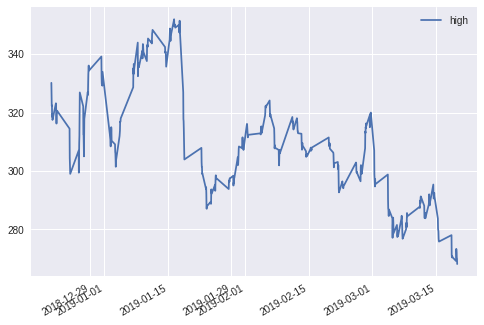

In [0]:
# Here we produce a simple line chart of the highest stock price for each period measured. Because our index is a time series, pandas automatically makes that the X axis.
tesla_table_numeric.plot(y='high')


**Step 7**

**Export your data as a CSV file.**

In [0]:
tesla_table_numeric.to_csv('tesla_time_series.csv')

### Tips for working with API's in Python 

In this workshop, we covered the basics of using Python to retrieve data from API's. This approach may cover many of your uses cases. But here are a few tips for further exploration:



*   If you need to make many requests in tandem -- _e.g._, you want to request stock price data for a long list of commodities -- you can sometimes speed up your code dramatically by using the asynchronous functionality available in the most recent releases of Python. 
    * The [`aiohttp` library](https://aiohttp.readthedocs.io/en/stable/) provides functions that, in conjunction with the `asyncio` library that ships with Python 3.7+, allow you to make asynchronous HTTP requests. For an introduction to asynchronous programming in Python that covers the latest developments, see "[Async IO in Python: A Complete Walkthrough](https://realpython.com/async-io-python/)."
*   Though many API's return data in JSON, some use XML instead. Unlike JSON, XML can't be converted to Python data types in one step; it's necessary to parse the XML first and extract the elements you want. The [lxml](https://lxml.de/) library provides robust functionality for doing that.

*  Before using any API, make sure you read the documentation and the terms of service. 
    * Many API's require you to limit your requests to a certain number per specified time period (_e.g._, per second, per hour, per day.) Violating these limits can sometimes cause the provider to shut off access to your account/IP address.
    * Some API's place restrictions on what you can do with the data. For instance, they may make it available only for research purposes, or only non-commercial uses, etc. 
    
